Testing R functionality in Notebook

In [1]:
a <- 100*3

In [2]:
getwd()

[1] "f:/kiran/ml model on agric/RNASEQ_Upstream_downstream/analysis"

Importing the data manupluation libraries

In [2]:
library(dplyr)
library(tidyverse)
library(GEOquery)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.2     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

Loading the feature count data that we downloaded from GEO

In [3]:
# read in the data ---------
dat <- read.csv(file = "GSE183947_fpkm.csv")
dim(dat)

[1] 20246    61

In [4]:
head(dat)

,X,CA.102548,CA.104338,CA.105094,CA.109745,CA.1906415,CA.1912627,CA.1924346,CA.1926760,CA.1927842,⋯,CAP.2040686,CAP.2046297,CAP.2046641,CAP.348981,CAP.354300,CAP.359448,CAP.94377,CAP.98389,CAP.98475,CAP.99145
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,0.93,1.97,0.00,5.45,4.52,4.75,3.96,3.58,6.41,⋯,6.66,8.35,8.94,6.33,5.94,6.35,3.74,4.84,10.46,4.54
2,TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.39,⋯,0.12,0.17,1.08,0.29,0.00,0.07,9.19,1.18,0.09,0.39
3,DPM1,0.00,0.43,0.00,3.43,8.45,8.53,7.80,7.62,6.40,⋯,4.93,7.47,5.72,4.96,9.28,9.15,4.77,3.75,7.31,2.77
4,SCYL3,5.78,5.17,8.76,4.58,7.20,6.03,9.05,5.37,5.92,⋯,8.02,6.00,5.28,4.98,4.45,7.00,4.14,5.51,7.45,2.33
5,C1orf112,2.83,6.26,3.37,6.24,5.16,13.69,6.69,5.28,7.65,⋯,7.91,4.61,8.35,9.84,7.68,5.62,2.81,7.08,7.28,5.39
6,FGR,4.80,1.83,0.00,4.23,15.87,8.56,13.28,12.27,5.58,⋯,6.99,6.16,13.27,19.33,2.89,40.13,10.53,9.00,4.45,11.42


The feature count data is a pivot table whose x-axis is genes and y-axis is sample ID. 

For detail understanding of the data we should need the meta data i.e sampleNames, expirement data, metatatsis etc. 

In [5]:
# get metadata --------
gse <- getGEO(GEO = 'GSE183947', GSEMatrix = TRUE)
# Error: The size of the connection buffer (131072) was not large enough                                          0s
# to fit a complete line:
#   * Increase it by setting `Sys.setenv("VROOM_CONNECTION_SIZE")`
Sys.setenv("VROOM_CONNECTION_SIZE" = 131072 * 1000)

Found 1 file(s)

GSE183947_series_matrix.txt.gz



In [6]:
gse


$GSE183947_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 0 features, 60 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM5574685 GSM5574686 ... GSM5574744 (60 total)
  varLabels: title geo_accession ... tissue:ch1 (41 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 35046993 
Annotation: GPL11154 


In [7]:
gse[[1]]
## this is phenotype data object, now we need to retirve the information

ExpressionSet (storageMode: lockedEnvironment)
assayData: 0 features, 60 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM5574685 GSM5574686 ... GSM5574744 (60 total)
  varLabels: title geo_accession ... tissue:ch1 (41 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 35046993 
Annotation: GPL11154 

In [8]:
phenoData(gse[[1]])

An object of class 'AnnotatedDataFrame'
  sampleNames: GSM5574685 GSM5574686 ... GSM5574744 (60 total)
  varLabels: title geo_accession ... tissue:ch1 (41 total)
  varMetadata: labelDescription

In [9]:
typeof(phenoData(gse[[1]]))

[1] "S4"

As we have this phenotype data, which in an S4 object class let's convert it into data frame and save in a variable

In [10]:
metadata <- pData(phenoData(gse[[1]]))
head(metadata)


,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,instrument_model,library_selection,library_source,library_strategy,relation,relation.1,supplementary_file_1,donor:ch1,metastasis:ch1,tissue:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,GSM5574685,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395376,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143676,NONE,102548,yes,breast tumor
GSM5574686,tumor rep2,GSM5574686,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395377,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143617,NONE,104338,yes,breast tumor
GSM5574687,tumor rep3,GSM5574687,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395378,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143618,NONE,105094,yes,breast tumor
GSM5574688,tumor rep4,GSM5574688,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395379,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143619,NONE,109745,no,breast tumor
GSM5574689,tumor rep5,GSM5574689,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21394912,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143620,NONE,1906415,no,breast tumor
GSM5574690,tumor rep6,GSM5574690,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21394913,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143621,NONE,1912627,yes,breast tumor


In [11]:
dim(metadata)

[1] 60 41

In [12]:
head(metadata[ ,c(1,10,11,17)])

,title,characteristics_ch1,characteristics_ch1.1,description
,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,tissue: breast tumor,metastasis: yes,CA.102548
GSM5574686,tumor rep2,tissue: breast tumor,metastasis: yes,CA.104338
GSM5574687,tumor rep3,tissue: breast tumor,metastasis: yes,CA.105094
GSM5574688,tumor rep4,tissue: breast tumor,metastasis: no,CA.109745
GSM5574689,tumor rep5,tissue: breast tumor,metastasis: no,CA.1906415
GSM5574690,tumor rep6,tissue: breast tumor,metastasis: yes,CA.1912627


Among 41 columns, we need two cloumn's meta data infor i.e characteristics_ch1 and characteristics_ch1.1

In [13]:
# select, mutate, rename ------------
metadata.modified <- metadata %>%
  select(1,10,11,17) %>%
  rename(tissue = characteristics_ch1) %>%
  rename(metastasis = characteristics_ch1.1) %>%
  mutate(tissue = gsub("tissue: ", "", tissue)) %>%
  mutate(metastasis = gsub("metastasis: ", "", metastasis))

In [14]:
head(metadata.modified)

,title,tissue,metastasis,description
,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,breast tumor,yes,CA.102548
GSM5574686,tumor rep2,breast tumor,yes,CA.104338
GSM5574687,tumor rep3,breast tumor,yes,CA.105094
GSM5574688,tumor rep4,breast tumor,no,CA.109745
GSM5574689,tumor rep5,breast tumor,no,CA.1906415
GSM5574690,tumor rep6,breast tumor,yes,CA.1912627


In [15]:
# looking at gene expression data ---------
head(dat)


,X,CA.102548,CA.104338,CA.105094,CA.109745,CA.1906415,CA.1912627,CA.1924346,CA.1926760,CA.1927842,⋯,CAP.2040686,CAP.2046297,CAP.2046641,CAP.348981,CAP.354300,CAP.359448,CAP.94377,CAP.98389,CAP.98475,CAP.99145
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,0.93,1.97,0.00,5.45,4.52,4.75,3.96,3.58,6.41,⋯,6.66,8.35,8.94,6.33,5.94,6.35,3.74,4.84,10.46,4.54
2,TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.39,⋯,0.12,0.17,1.08,0.29,0.00,0.07,9.19,1.18,0.09,0.39
3,DPM1,0.00,0.43,0.00,3.43,8.45,8.53,7.80,7.62,6.40,⋯,4.93,7.47,5.72,4.96,9.28,9.15,4.77,3.75,7.31,2.77
4,SCYL3,5.78,5.17,8.76,4.58,7.20,6.03,9.05,5.37,5.92,⋯,8.02,6.00,5.28,4.98,4.45,7.00,4.14,5.51,7.45,2.33
5,C1orf112,2.83,6.26,3.37,6.24,5.16,13.69,6.69,5.28,7.65,⋯,7.91,4.61,8.35,9.84,7.68,5.62,2.81,7.08,7.28,5.39
6,FGR,4.80,1.83,0.00,4.23,15.87,8.56,13.28,12.27,5.58,⋯,6.99,6.16,13.27,19.33,2.89,40.13,10.53,9.00,4.45,11.42


In [16]:
# reshaping data - from wide to long--------
dat.long <- dat %>%
  rename(gene = X) %>%
  gather(key = 'samples', value = 'FPKM', -gene)

In [17]:
head(dat.long)

,gene,samples,FPKM
,<chr>,<chr>,<dbl>
1,TSPAN6,CA.102548,0.93
2,TNMD,CA.102548,0.00
3,DPM1,CA.102548,0.00
4,SCYL3,CA.102548,5.78
5,C1orf112,CA.102548,2.83
6,FGR,CA.102548,4.80


In [18]:
dim(dat.long)

[1] 1214760       3

In [19]:
dim(dat)

[1] 20246    61

Now we have restructured that data from wide to long, we can see 20246 entries of each samples (60 samples) are stacked vertically to form 1214760 rows (20246 * 6 )

In [20]:
# join dataframes = dat.long + metadata.modified

dat.long <- dat.long %>%
  left_join(., metadata.modified, by = c("samples" = "description")) 

In [21]:
head(dat.long)

,gene,samples,FPKM,title,tissue,metastasis
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,TSPAN6,CA.102548,0.93,tumor rep1,breast tumor,yes
2,TNMD,CA.102548,0.00,tumor rep1,breast tumor,yes
3,DPM1,CA.102548,0.00,tumor rep1,breast tumor,yes
4,SCYL3,CA.102548,5.78,tumor rep1,breast tumor,yes
5,C1orf112,CA.102548,2.83,tumor rep1,breast tumor,yes
6,FGR,CA.102548,4.80,tumor rep1,breast tumor,yes


In [22]:
# explore data ------
# filter, group_by, summarize and arrange 
dat.long %>%
  filter(gene == 'BRCA1' | gene == 'BRCA2') %>%
  group_by(gene, tissue) %>%
  summarize(mean_FPKM = mean(FPKM),
            median_FPKM = median(FPKM)) %>%
  arrange(-mean_FPKM)

`summarise()` has grouped output by 'gene'. You can override using the
`.groups` argument.


gene,tissue,mean_FPKM,median_FPKM
<chr>,<chr>,<dbl>,<dbl>
BRCA1,breast tumor,10.042333,6.965
BRCA1,normal breast tissue,7.698667,6.450
BRCA2,normal breast tissue,3.047333,1.250
BRCA2,breast tumor,2.044000,1.600


In [23]:
typeof(dat.long)

[1] "list"

In [24]:
dim(dat.long)

[1] 1214760       6

In [25]:
length((unique(dat.long$gene)))

[1] 20246

In [26]:
library(ggplot2)

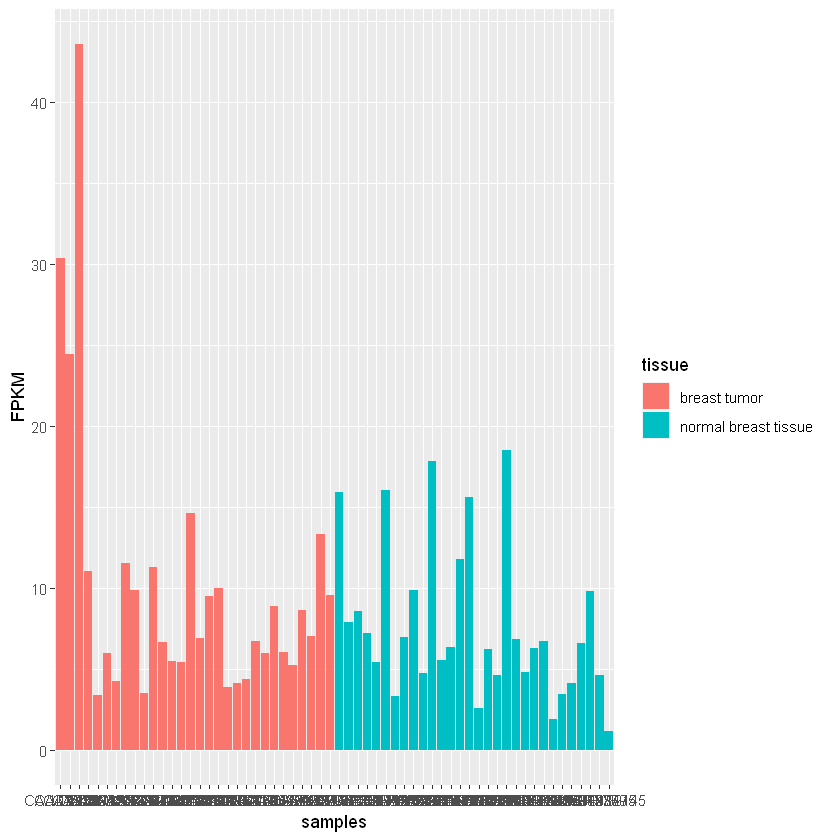

In [48]:
# 1. barplot
dat.long %>%
  filter(gene == 'BRCA1') %>%
  ggplot(., aes(x = samples, y = FPKM, fill = tissue)) +
  geom_col()

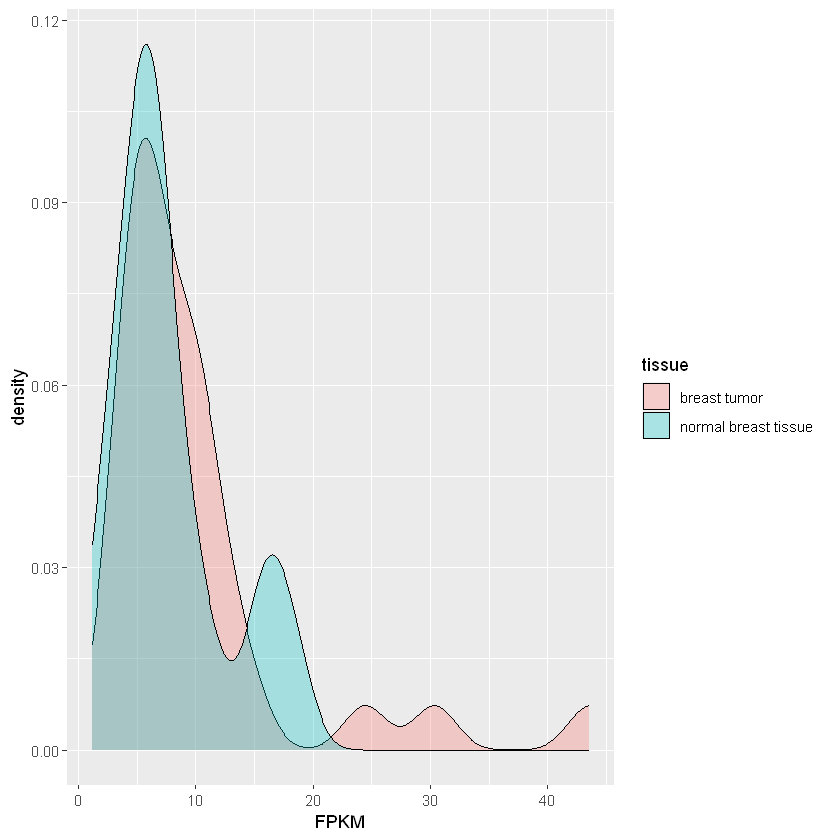

In [49]:
# 2. density
dat.long %>%
  filter(gene == 'BRCA1') %>%
  ggplot(., aes(x = FPKM, fill = tissue)) +
  geom_density(alpha = 0.3)

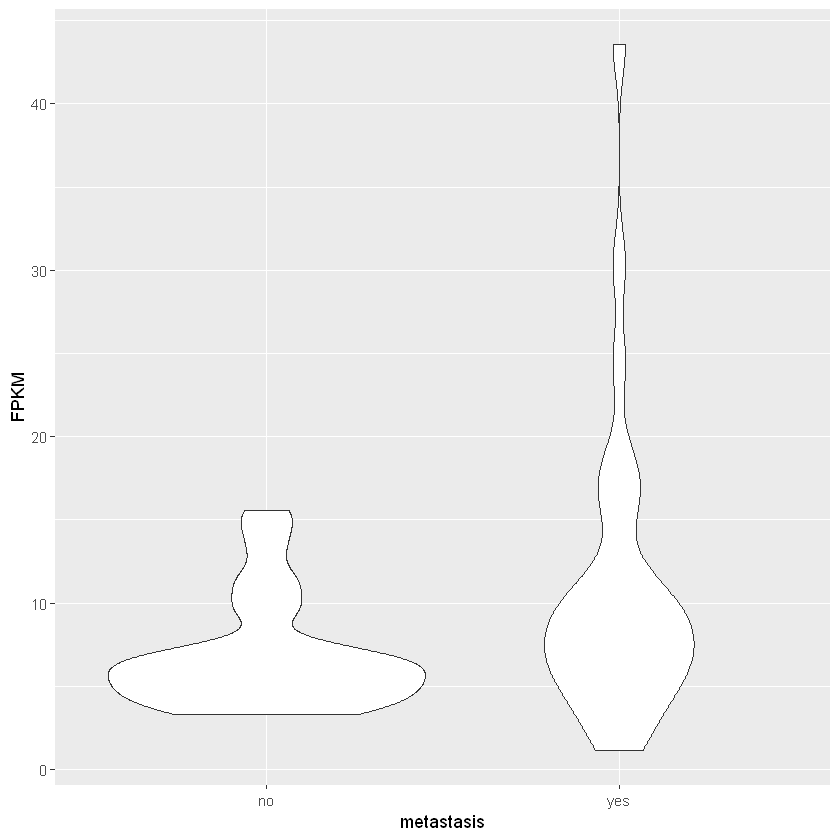

In [50]:
# 3. boxplot 
dat.long %>%
  filter(gene == 'BRCA1') %>%
  ggplot(., aes(x = metastasis, y = FPKM)) +
  #geom_boxplot()
  geom_violin()

`geom_smooth()` using formula = 'y ~ x'


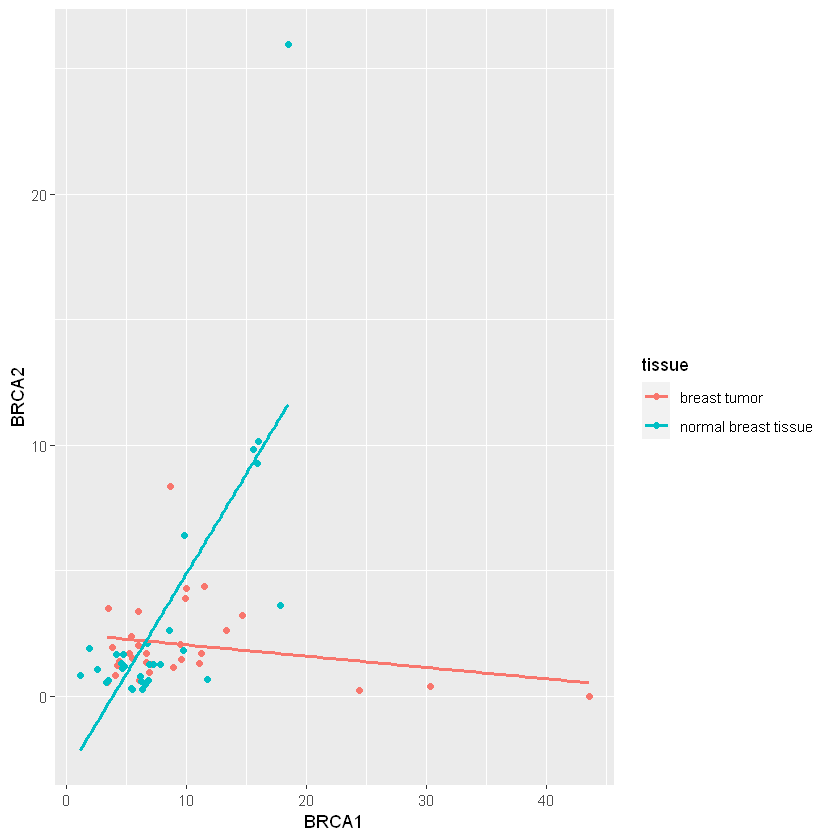

In [51]:
# 4. scatterplot
dat.long %>%
  filter(gene == 'BRCA1' | gene == 'BRCA2') %>%
  spread(key = gene, value = FPKM) %>%
  ggplot(., aes(x = BRCA1, y = BRCA2, color = tissue)) +
  geom_point() +
  geom_smooth(method = 'lm', se = FALSE)

In [27]:
# 5. heatmap
genes.of.interest <- c('BRCA1', 'BRCA2', 'TP53', 'ALK', 'MYCN')

pdf("heatmap_save2.pdf", width = 10, height = 8)
dat.long %>%
  filter(gene %in% genes.of.interest) %>%
  ggplot(., aes(x = samples, y = gene, fill = FPKM)) +
  geom_tile() +
  scale_fill_gradient(low = 'white', high = 'red')

dev.off()

# ggsave(p, filename = 'heatmap_save1.pdf', width = 10, height = 8)

png 
  2